In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [4]:
df_police = pd.read_csv('./police_violence_cleaned_again.csv')
df_police.head(10)

,name,age,gender,race,date_of_incident,city,state,zipcode,responsible_agency,cause_of_death,criminal_charges,mental_illness,alleged_weapon,alleged_threat_level,armed_or_unarmed
0,Jose Oyuela-Palma,49,Male,Unknown race,9/21/2021,Henderson,NV,89002,Henderson Police Department,Gunshot,No known charges,No,undetermined,other,Unclear
1,Trent Leach,30,Male,Unknown race,9/21/2021,Las Vegas,NV,89101,Las Vegas Metropolitan Police Department,Gunshot,No known charges,No,gun,attack,Allegedly Armed
2,Phillip Lopez,42,Male,Unknown race,9/20/2021,Signal Hill,CA,90755,Signal Hill Police Department,Gunshot,No known charges,No,knife,attack,Allegedly Armed
3,Deon Ledet,30,Male,Black,9/20/2021,Houston,TX,77001,Houston Police Department,Gunshot,No known charges,No,gun,attack,Allegedly Armed
4,Jason Husted,47,Male,Unknown race,9/18/2021,West Ashley,SC,29414,Charleston County Sheriff's Office,Gunshot,No known charges,No,gun,attack,Allegedly Armed
5,Unsfored Lewis Thurmond,27,Male,Unknown race,9/18/2021,Smyrna,GA,30080,Smyrna Police Department,Gunshot,No known charges,Yes,gun,attack,Allegedly Armed
6,Adrian Cameron,47,Male,Black,9/18/2021,Nashville,TN,37214,Metropolitan Nashville Police Department,Gunshot,No known charges,No,gun,attack,Allegedly Armed
7,Christopher E. Rush,34,Male,Unknown race,9/18/2021,Mahoning Township,PA,16132,Mahoning Township Police Department,Gunshot,No known charges,No,sharp object,attack,Allegedly Armed
8,Matthew Joseph Wilbanks,41,Male,Unknown race,9/17/2021,Marietta,GA,30066,Cobb County Police Department,Gunshot,No known charges,Yes,knife,other,Allegedly Armed
9,Jonathan Carroll,38,Male,Unknown race,9/17/2021,Escondido,CA,92025,Escondido Police Department,Gunshot,No known charges,No,gun,other,Allegedly Armed


In [5]:
df_population = pd.read_csv('./population_by_state.csv')
df_population.head()

,state,abbreviation,population,lat,long
0,Alabama,AL,4903185,32.377716,-86.300568
1,Alaska,AK,731545,58.301598,-134.420212
2,Arizona,AZ,7278717,33.448143,-112.096962
3,Arkansas,AR,3017804,34.746613,-92.288986
4,California,CA,39512223,38.576668,-121.493629


In [7]:
df_population.head(52)

,state,abbreviation,population,lat,long
0,Alabama,AL,4903185,32.377716,-86.300568
1,Alaska,AK,731545,58.301598,-134.420212
2,Arizona,AZ,7278717,33.448143,-112.096962
3,Arkansas,AR,3017804,34.746613,-92.288986
4,California,CA,39512223,38.576668,-121.493629
5,Colorado,CO,5758736,39.739227,-104.984856
6,Connecticut,CT,3565287,41.764046,-72.682198
7,Delaware,DE,973764,39.157307,-75.519722
8,District of Columbia,DC,705749,38.895110,-77.036370
9,Florida,FL,21477737,30.438118,-84.281296


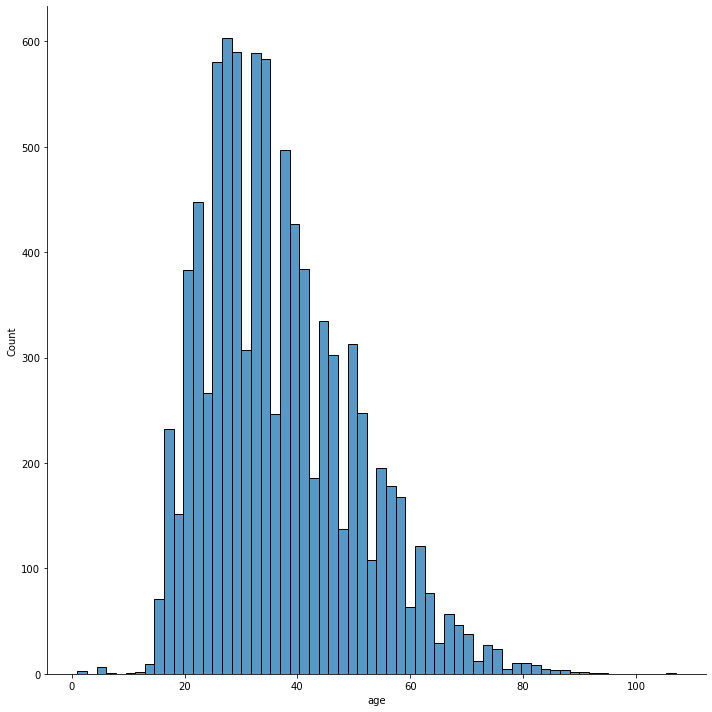

In [11]:
sns.displot(data=df_police, x='age',height=10)
plt.show()

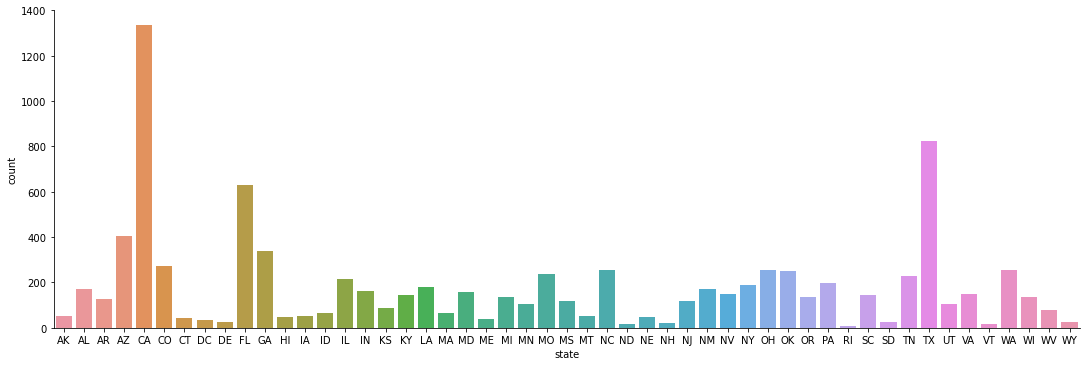

In [12]:
sns.catplot(data=df_police.sort_values(by='state'), x='state', kind='count',height=5, aspect=3)
plt.show()

In [13]:
for state in df_population['abbreviation']:
    
    print(df_population.loc[df_population['abbreviation'] == state, ['population']])  


   population
0     4903185
   population
1      731545
   population
2     7278717
   population
3     3017804
   population
4    39512223
   population
5     5758736
   population
6     3565287
   population
7      973764
   population
8      705749
   population
9    21477737
    population
10    10617423
    population
11     1415872
    population
12     1787065
    population
13    12671821
    population
14     6732219
    population
15     3155070
    population
16     2913314
    population
17     4467673
    population
18     4648794
    population
19     1344212
    population
20     6045680
    population
21     6892503
    population
22     9986857
    population
23     5639632
    population
24     2976149
    population
25     6137428
    population
26     1068778
    population
27     1934408
    population
28     3080156
    population
29     1359711
    population
30     8882190
    population
31     2096829
    population
32    19453561
    population
33    10488084


In [14]:
Figure out how to get the population based on the state




SyntaxError: invalid syntax (<ipython-input-14-468c85f783ea>, line 1)

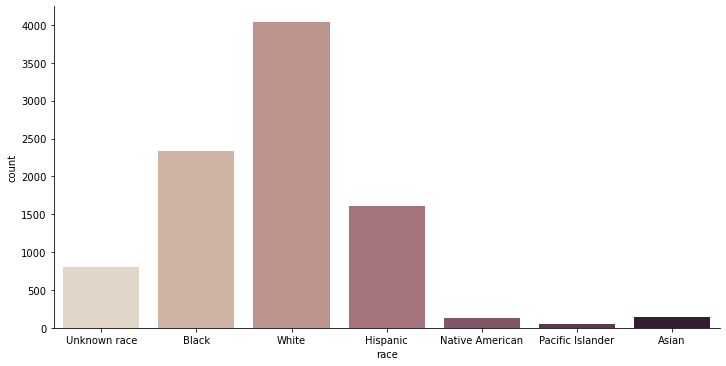

In [15]:
sns.catplot(data=df_police, x='race', kind="count", palette="ch:.25", height=5, aspect=2)
plt.show()


In [16]:
date_list = df_police['date_of_incident'].to_list()
date_map = dict()
for date in date_list:
    year = date.split('/')[2]
    if year in date_map:
        date_map[year] += 1
    else:
        date_map[year] = 1

date_map

# d = {'col1': [1, 2], 'col2': [3, 4]}

{'2021': 672,
 '2020': 1000,
 '2019': 1065,
 '2018': 1066,
 '2017': 1051,
 '2016': 1057,
 '2015': 1096,
 '2014': 1024,
 '2013': 1065}

In [17]:
df_date = pd.DataFrame(data=date_map, columns=['year', 'count'])

df_date['year'] = date_map.keys()
df_date['count'] = date_map.values()
df_date

,year,count
0,2021,672
1,2020,1000
2,2019,1065
3,2018,1066
4,2017,1051
5,2016,1057
6,2015,1096
7,2014,1024
8,2013,1065


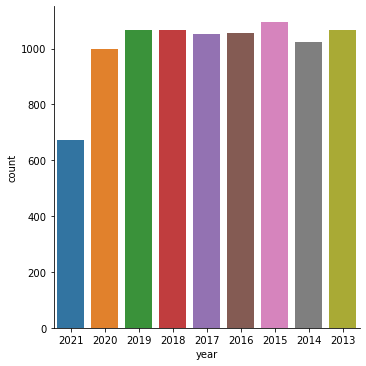

In [18]:
sns.catplot(x="year", y="count",kind="bar", data=df_date)

In [20]:
df_police['date_of_incident']=pd.to_datetime(df_police['date_of_incident'])
df_police.dtypes

name                            object
age                              int64
gender                          object
race                            object
date_of_incident        datetime64[ns]
city                            object
state                           object
zipcode                          int64
responsible_agency              object
cause_of_death                  object
criminal_charges                object
mental_illness                  object
alleged_weapon                  object
alleged_threat_level            object
armed_or_unarmed                object
dtype: object

In [21]:
df_police=df_police.set_index('date_of_incident')
df_police

,name,age,gender,race,city,state,zipcode,responsible_agency,cause_of_death,criminal_charges,mental_illness,alleged_weapon,alleged_threat_level,armed_or_unarmed
date_of_incident,,,,,,,,,,,,,,
2021-09-21,Jose Oyuela-Palma,49,Male,Unknown race,Henderson,NV,89002,Henderson Police Department,Gunshot,No known charges,No,undetermined,other,Unclear
2021-09-21,Trent Leach,30,Male,Unknown race,Las Vegas,NV,89101,Las Vegas Metropolitan Police Department,Gunshot,No known charges,No,gun,attack,Allegedly Armed
2021-09-20,Phillip Lopez,42,Male,Unknown race,Signal Hill,CA,90755,Signal Hill Police Department,Gunshot,No known charges,No,knife,attack,Allegedly Armed
2021-09-20,Deon Ledet,30,Male,Black,Houston,TX,77001,Houston Police Department,Gunshot,No known charges,No,gun,attack,Allegedly Armed
2021-09-18,Jason Husted,47,Male,Unknown race,West Ashley,SC,29414,Charleston County Sheriff's Office,Gunshot,No known charges,No,gun,attack,Allegedly Armed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,Andrew L. Closson,21,Male,White,Gordon,WI,54838,Douglas County Sheriff's Office,Gunshot,No known charges,Drug or alcohol use,gun,other,Allegedly Armed
2013-01-01,Abel Gurrola,26,Male,Hispanic,Bakersfield,CA,93304,Bakersfield Police Department,Gunshot,No known charges,No,gun,other,Allegedly Armed
2013-01-01,Andrew Layton,26,Male,White,Mankato,MN,56001,Mankato Department of Public Safety,Taser,No known charges,No,none,other,Unarmed/Did Not Have Actual Weapon


In [22]:
df_police.index

DatetimeIndex(['2021-09-21', '2021-09-21', '2021-09-20', '2021-09-20',
               '2021-09-18', '2021-09-18', '2021-09-18', '2021-09-18',
               '2021-09-17', '2021-09-17',
               ...
               '2013-01-03', '2013-01-03', '2013-01-03', '2013-01-02',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='date_of_incident', length=9096, freq=None)

In [28]:
df['Datetime']=pd.to_datetime(df['date'] + ' ' + df['time'])
df = df.set_index('Datetime')



NameError: name 'df' is not defined

In [29]:
pd.read_csv('./police_violence_cleaned_again.csv', parse_dates=[['date_of_incident','Time']], index_col=0)

ValueError: Missing column provided to 'parse_dates': 'Time'